In [ ]:
pip install pillow numpy


In [2]:
# 1. Importation des bibliothèques

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

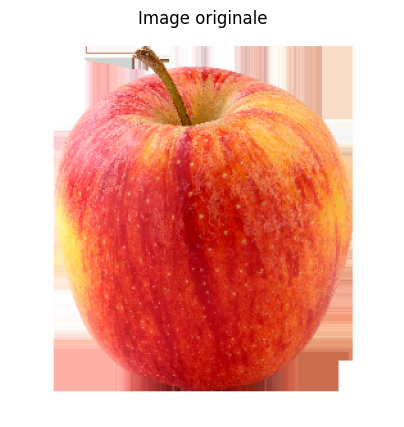

In [4]:
# 2. Chargement de l'image
image = cv2.imread("/content/Pomme.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # conversion BGR -> RGB

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title("Image originale")
plt.axis('off')
plt.show()

In [5]:
# 3. Prétraitement : transformation en tableau 2D
# Chaque pixel devient une ligne : [R, G, B]
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [6]:
# 4. Application du clustering K-Means
k = 3  # nombre de segments souhaités
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(pixel_values)
centers = np.uint8(kmeans.cluster_centers_)


In [7]:
# 5. Reconstruction de l'image segmentée
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

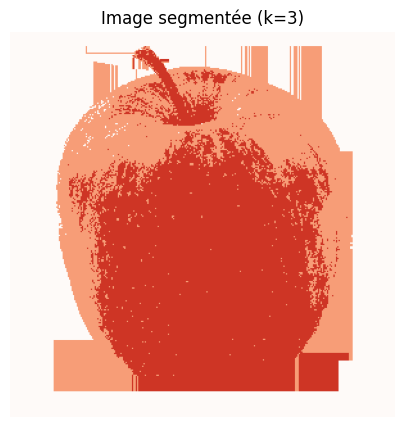

In [8]:
# 6. Affichage de l'image segmentée
plt.figure(figsize=(5,5))
plt.imshow(segmented_image)
plt.title(f"Image segmentée (k={k})")
plt.axis('off')
plt.show()

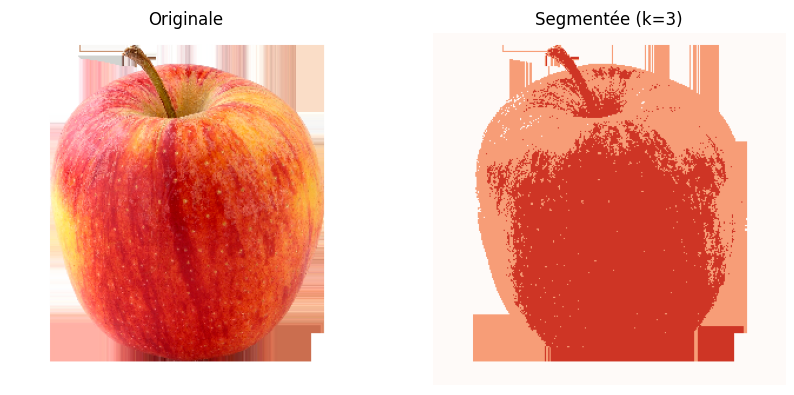

In [9]:
# 7. Comparaison côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image)
ax1.set_title("Originale")
ax1.axis('off')

ax2.imshow(segmented_image)
ax2.set_title(f"Segmentée (k={k})")
ax2.axis('off')

plt.show()